In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from h3 import h3
from folium import Map, Marker, GeoJson

from folium import Map, Marker, GeoJson
from folium.plugins import MarkerCluster
import branca.colormap as cm
from branca.colormap import linear
import folium
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

import statistics

from geojson.feature import *
from area import area

import copy
from IPython.display import Image, display
from IPython.utils.text import columnize
import warnings
warnings.filterwarnings('ignore')

In [49]:
!pip install area

  Created wheel for area: filename=area-1.1.1-cp36-none-any.whl size=3609 sha256=b8c44e60d9c77b7aec187fc7ba64088d94d42cb8541ae2bb97e99be7406372bd
  Stored in directory: /root/.cache/pip/wheels/66/c0/12/b2ef12e07a617ba6f7aaeb32348ea6f14205cc1985f51a134e
Successfully built area


In [5]:
data = pd.read_csv('/content/drive/My Drive/BERT/testRideData.csv')
data.head()

,acceptedDriverData/driverId,acceptedTime,customerComments,destination/latitude,destination/longitude,destinationLocationEnglish,destinationLocationHindi,driverId,driverMobile,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/distance,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/location/0,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/location/1,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/time,endTime,invoiceId,otpValue,paymentId,paymentMode,projectRideDistance,projectedPickUpTime,projectedRideCost,projectedRideCostWithOffer,projectedRideTime,requestedTime,rideId,riderId,riderInvoiceId,riderMobile,riderName,riderPaymentId,riderRating,source/latitude,source/longitude,sourceLocationEnglish,sourceLocationHindi,startTime,startedDriverData/datetime,startedDriverData/driverId,startedDriverData/latitude,startedDriverData/longitude,...,responses/1578490159665/dXJq62VDE2ZFdsCTIcBfARXB2b82,responses/1578494729177/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495002666/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495405978/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495493781/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495534886/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495747898/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495869888/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495927186/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578496044885/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578496093277/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578578788782/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578581945784/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1578639799444/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1578741858596/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579007570552/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579074449024/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579095773022/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579166864065/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/distance,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/location/0,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/location/1,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/time,responses/1579176048381/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579189939374/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579191425669/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579249101464/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579249107642/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579249170185/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579249177236/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579250131760/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579251135716/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579253802416/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579253800977/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254052326/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254379221/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254473606/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254618196/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579757911919/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579771490451/7vT2uLlCWKT6tcpvepXE5Tb7nFe2
0,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:34:41,NaN,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,1.787755,28.694162,77.189727,631.0,2019-05-06 21:35:19,-LeCt0L8PqXL491I7YGn,774,-LeCt61DF-A2B7uF4Pu6,cash,1.79 km,631.0,25.00,30.00,6 mins,2019-05-06 21:34:37,-LeCswkVZouYyOfuzfsQ,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCt0L8PqXL491I7YGo,8.368318e+09,NaN,-LeCt62f5Rtbnh-PsxKL,3.5,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:34:56,2019-05-06 21:34:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694188,77.189562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:48:23,NaN,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,1.787761,28.694153,77.189730,631.0,2019-05-06 21:50:57,-LeCwLXMwfkcuv8mknV3,869,-LeCwfVlIXmrkiVLPE-9,cash,1.79 km,63

In [6]:
data.isnull().any()

acceptedDriverData/driverId                             False
acceptedTime                                            False
customerComments                                         True
destination/latitude                                    False
destination/longitude                                   False
                                                        ...  
responses/1579254379221/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579254473606/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579254618196/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579757911919/7vT2uLlCWKT6tcpvepXE5Tb7nFe2     True
responses/1579771490451/7vT2uLlCWKT6tcpvepXE5Tb7nFe2     True
Length: 502, dtype: bool

In [7]:
data1 = data.copy()
data1 = data1.dropna(axis='columns')
data1.head()

,acceptedDriverData/driverId,acceptedTime,destination/latitude,destination/longitude,destinationLocationEnglish,destinationLocationHindi,driverId,driverMobile,endTime,invoiceId,otpValue,paymentId,paymentMode,projectRideDistance,projectedRideCost,projectedRideCostWithOffer,requestedTime,riderId,riderInvoiceId,riderPaymentId,source/latitude,source/longitude,sourceLocationEnglish,sourceLocationHindi,startTime,startedDriverData/datetime,startedDriverData/driverId,startedDriverData/latitude,startedDriverData/longitude,status,type
0,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:34:41,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-06 21:35:19,-LeCt0L8PqXL491I7YGn,774,-LeCt61DF-A2B7uF4Pu6,cash,1.79 km,25.00,30.00,2019-05-06 21:34:37,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCt0L8PqXL491I7YGo,-LeCt62f5Rtbnh-PsxKL,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:34:56,2019-05-06 21:34:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694188,77.189562,Trip Ended,Solo
1,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:48:23,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-06 21:50:57,-LeCwLXMwfkcuv8mknV3,869,-LeCwfVlIXmrkiVLPE-9,cash,1.79 km,25.00,30.00,2019-05-06 21:48:21,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCwLXN5PeQuI1s3UMj,-LeCwfVmI_st7R6Mgsch,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:49:32,2019-05-06 21:48:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694144,77.189718,Trip Ended,Solo
2,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-07 11:36:10,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-07 11:36:43,-LeFtcddkFsmfab0LtaE,536,-LeFtfX5dO2he9Ry_qg5,cash,1.79 km,25.00,30.00,2019-05-07 11:36:06,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeFtcdhyV0EVa5bj1s1,-LeFtfX6H8Ius2GdH6WP,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-07 11:36:31,2019-05-07 11:36:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.698000,77.206000,Trip Ended,Solo
3,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-07 21:19:20,28.683289,77.203283,"33-e, Block E, Kamla Nagar, Delhi, 110007, India","33-ई, ब्लॉक ई, कमला नगर, दिल्ली, 110007, भारत",7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-07 21:20:10,-LeHz6Q_jvPZDCsGNIt5,442,-LeHzDncje_POmTobyyV,cash,2.15 km,26.48,31.78,2019-05-07 21:19:13,zBoOFyivDISeabYpGUzCNKe3By52,-LeHz6Qbx_On8I6rnHEa,-LeHzDndreo-VfakyYvx,28.692583,77.194582,"5A, Bhama Shah Marg, Near Gurudwara Nanak Piao...","5A, भामा शाह मार्ग, गुरुद्वारा नानक प्याऊ के प...",2019-05-07 21:19:40,2019-05-07 21:18:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.689111,77.194208,Trip Ended,Solo
4,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-08 14:56:55,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-08 14:57:12,-LeLl871sY1idJkvELUL,572,-LeLl9BpsxBizqo1kcyg,cash,1.79 km,25.00,37.50,2019-05-08 14:56:48,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeLl871sY1idJkvELUM,-LeLl9BpsxBizqo1kcyh,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-08 14:57:07,2019-05-08 14:56:01,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.702165,77.194101,Trip Ended,Solo


In [8]:
data1.shape

(1257, 31)

In [9]:
data1.columns

Index(['acceptedDriverData/driverId', 'acceptedTime', 'destination/latitude',
       'destination/longitude', 'destinationLocationEnglish',
       'destinationLocationHindi', 'driverId', 'driverMobile', 'endTime',
       'invoiceId', 'otpValue', 'paymentId', 'paymentMode',
       'projectRideDistance', 'projectedRideCost',
       'projectedRideCostWithOffer', 'requestedTime', 'riderId',
       'riderInvoiceId', 'riderPaymentId', 'source/latitude',
       'source/longitude', 'sourceLocationEnglish', 'sourceLocationHindi',
       'startTime', 'startedDriverData/datetime', 'startedDriverData/driverId',
       'startedDriverData/latitude', 'startedDriverData/longitude', 'status',
       'type'],
      dtype='object')

In [0]:
#convert the locations to float32 and datetime to str
datatypes = {'acceptedTime': 'str',
            'source/latitude': 'float32',
            'source/longitude':'float32'}

In [0]:
columns = list(datatypes.keys())

In [12]:
columns

['acceptedTime', 'source/latitude', 'source/longitude']

In [13]:
data1.shape

(1257, 31)

In [0]:
chunksize = 1257

In [16]:
# list to hold the batch dataframe
df_list = []

for df_chunk in tqdm(pd.read_csv('/content/drive/My Drive/BERT/testRideData.csv', dtype=datatypes,chunksize=chunksize,usecols=columns)):
    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk)

1it [00:00, 32.02it/s]


In [17]:
df_list

[             acceptedTime  source/latitude  source/longitude
 0     2019-05-06 21:34:41        28.698442         77.207397
 1     2019-05-06 21:48:23        28.698442         77.207397
 2     2019-05-07 11:36:10        28.698442         77.207397
 3     2019-05-07 21:19:20        28.692583         77.194580
 4     2019-05-08 14:56:55        28.698442         77.207397
 ...                   ...              ...               ...
 1252  2020-01-22 18:01:13        28.694111         77.189728
 1253  2020-01-23 11:05:16        28.694080         77.189713
 1254  2020-01-23 11:08:31        28.694082         77.189713
 1255  2020-01-23 14:49:15        28.694113         77.189735
 1256  2020-01-23 14:54:50        28.694113         77.189705
 
 [1257 rows x 3 columns]]

In [0]:
df_list1 = df_list.copy()

In [19]:
# Merge them all
ride_df = pd.concat(df_list1)
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 3 columns):
acceptedTime        1257 non-null object
source/latitude     1257 non-null float32
source/longitude    1257 non-null float32
dtypes: float32(2), object(1)
memory usage: 19.8+ KB


Text(0.5, 1.0, 'Pickup_Locations')

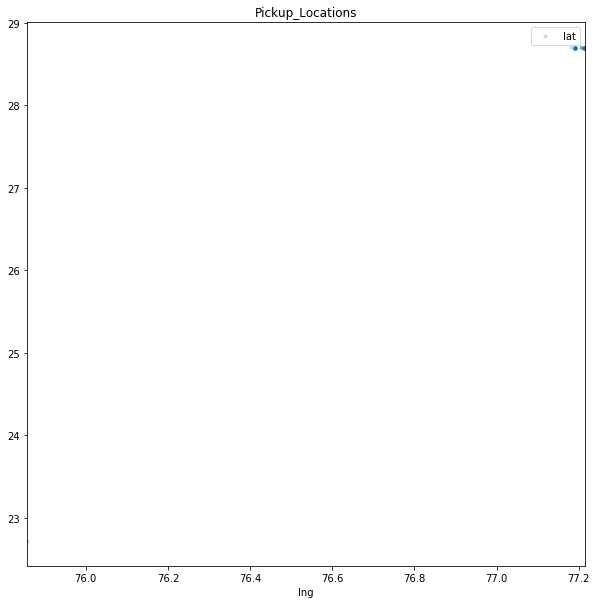

In [20]:
ride_df.columns = ['dt','lat','lng']
test = ride_df.sample(frac=0.05, replace=False, random_state=1)
test.plot(x='lng', y='lat', style='.',alpha=0.2,figsize=(10,10));
plt.title('Pickup_Locations')

In [21]:
ride_df.min()

dt     2019-05-06 21:34:41
lat                 22.684
lng                75.8565
dtype: object

In [22]:
ride_df.max()

dt     2020-01-23 14:54:50
lat                 28.705
lng                77.2158
dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Pickup Locations')

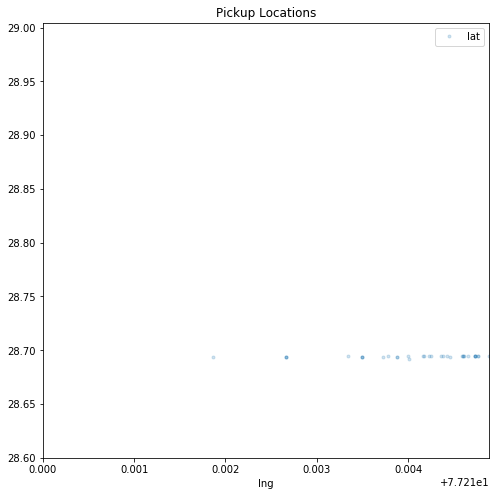

In [23]:
test = test[ride_df.lat>22.683]
test = test[test.lat<28.706]
test.plot(x='lng',y='lat',style='.',alpha=0.2,figsize=(8,8),xlim=77.210,ylim=28.6);
plt.title('Pickup Locations')

In [0]:
def counts_by_hexagon(df, resolution):
    """
    Use h3.geo_to_h3 to index each data point into the spatial index of the specified resolution.
    Use h3.h3_to_geo_boundary to obtain the geometries of these hexagons
    
    Ex counts_by_hexagon(data, 9)
    """
    df = df[["lat","lng"]]
    
    df["hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["lat"], row["lng"], resolution), axis = 1)
    
    df_aggreg = df.groupby(by = "hex_id").size().reset_index()
    df_aggreg.columns = ["hex_id", "value"]
    
    df_aggreg["geometry"] =  df_aggreg.hex_id.apply(lambda x: 
                                                           {    "type" : "Polygon",
                                                                 "coordinates": 
                                                                [h3.h3_to_geo_boundary(h3_address=x,geo_json=True)]
                                                            }
                                                        )
    
    return df_aggreg

def hexagons_dataframe_to_geojson(df_hex, file_output = None):
    """
    Produce the GeoJSON for a dataframe that has a geometry column in geojson 
    format already, along with the columns hex_id and value
    
    Ex counts_by_hexagon(data)
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        feature = Feature(geometry = row["geometry"] , id=row["hex_id"], properties = {"value" : row["value"]})
        list_features.append(feature)
        
    feat_collection = FeatureCollection(list_features)
    
    geojson_result = json.dumps(feat_collection)
    
    #optionally write to file
    if file_output is not None:
        with open(file_output,"w") as f:
            json.dump(feat_collection,f)
    
    return geojson_result


def choropleth_map(df_aggreg, border_color = 'black', fill_opacity = 0.7, initial_map = None, with_legend = False,
                   kind = "linear"):
    
    """
    Creates choropleth maps given the aggregated data.
    """    
    #colormap
    min_value = df_aggreg["value"].min()
    max_value = df_aggreg["value"].max()
    m = round ((min_value + max_value ) / 2 , 0)
    
    #take resolution from the first row
    res = h3.h3_get_resolution(df_aggreg.loc[0,'hex_id'])
    
    if initial_map is None:
        initial_map = Map(location= [28.600000, 77.100000], zoom_start=12, tiles="cartodbpositron",attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>')
        

    #the colormap 
    #color names accepted https://github.com/python-visualization/branca/blob/master/branca/_cnames.json
    if kind == "linear":
        custom_cm = cm.LinearColormap(['green','yellow','red'], vmin=min_value, vmax=max_value)
    elif kind == "outlier":
        #for outliers, values would be -11,0,1
        custom_cm = cm.LinearColormap(['blue','white','red'], vmin=min_value, vmax=max_value)
    elif kind == "filled_nulls":
        custom_cm = cm.LinearColormap(['sienna','green','yellow','red'], 
                                      index=[0,min_value,m,max_value],vmin=min_value,vmax=max_value)
   

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg)
    
    #plot on map
    name_layer = "Choropleth " + str(res)
    if kind != "linear":
        name_layer = name_layer + kind
        
    GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': custom_cm(feature['properties']['value']),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)
    #add legend (not recommended if multiple layers)
    if with_legend == True:
        custom_cm.add_to(initial_map)
    
    
    
    return initial_map

def plot_scatter(df, metric_col, x='lng', y='lat', marker='.', alpha=1, figsize=(16,12), colormap='viridis'):
    """
    Scatter plot function for h3 indexed objects
    """    
    df.plot.scatter(x=x, y=y, c=metric_col, title=metric_col
                    , edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])


In [54]:
df_aggreg = counts_by_hexagon(df = test, resolution = 9)
df_aggreg.sort_values(by = "value", ascending = False, inplace = True)
# Creates a map using Folium
hexmap = choropleth_map(df_aggreg = df_aggreg, with_legend = True)
hexmap

In [53]:
df_aggreg_9 = counts_by_hexagon(df = dfgeo, resolution = 9)
df_aggreg_8 = counts_by_hexagon(df = dfgeo, resolution = 8)
df_aggreg_7 = counts_by_hexagon(df = dfgeo, resolution = 7)
df_aggreg_6 = counts_by_hexagon(df = dfgeo, resolution =6)


hexmap9 = choropleth_map(df_aggreg = df_aggreg_9,with_legend = False)
hexmap8 = choropleth_map(df_aggreg = df_aggreg_8, initial_map = hexmap9, with_legend = False)
hexmap7 = choropleth_map(df_aggreg = df_aggreg_7, initial_map = hexmap8 , with_legend = False)
hexmap6 = choropleth_map(df_aggreg = df_aggreg_6, initial_map = hexmap7, with_legend = False)

folium.map.LayerControl('bottomright', collapsed=False).add_to(hexmap6)

hexmap6.save('source/choropleth_multiple_res.html')
hexmap6

NameError: ignored